<a href="https://colab.research.google.com/github/KrishnaMoorthy47/Home-Loan-Approval-1/blob/main/HomeLoanApproval_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df = pd.read_csv('/content/loan_sanction_train.csv')

test = pd.read_csv('/content/loan_sanction_test.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df = df.drop('Loan_ID',axis =1)

In [8]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [10]:
#df.Gender = df.Gender.fillna('Male')

In [11]:
#one_hot = pd.get_dummies(df['Gender'],prefix="Gender",drop_first=True)
#df = df.drop('Gender',axis = 1)
#df = df.join(one_hot)
#df.head()

In [12]:
#df.replace({'Yes':1,'No':0},inplace=True)
#df.head()

In [13]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [14]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
df.Married = df.Married.fillna('Yes')

In [16]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
df.Dependents = df.Dependents.fillna('0')

In [18]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [20]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [21]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)

In [23]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [24]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [25]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
len(df)

614

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


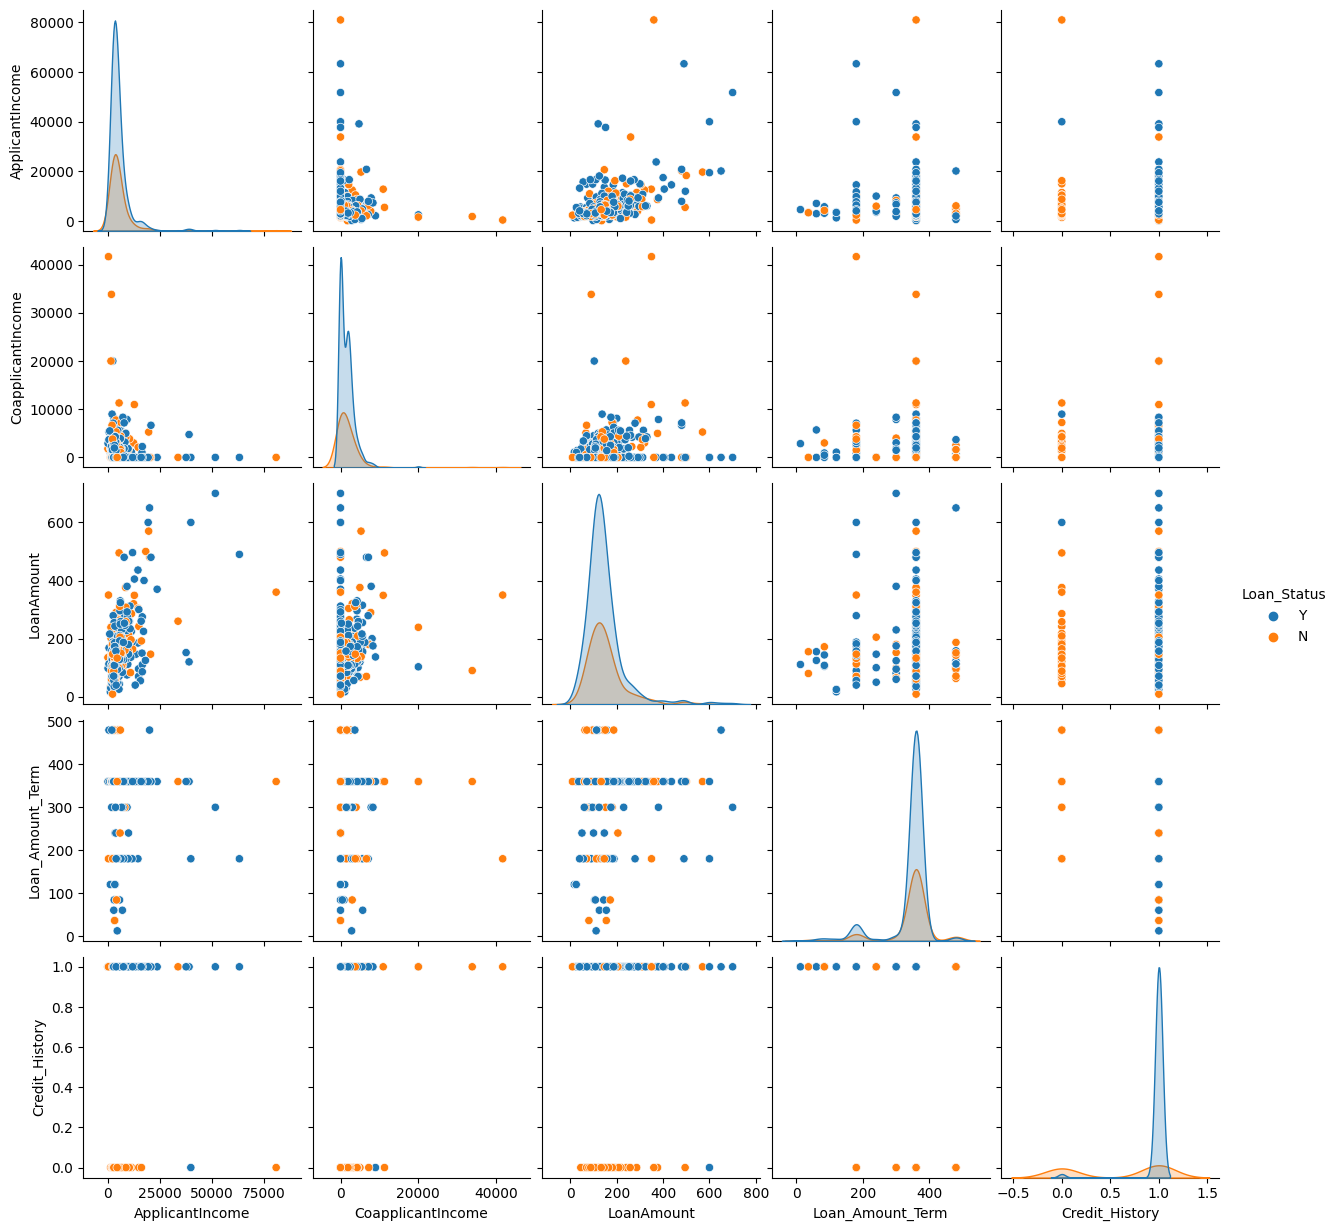

In [28]:
sns.pairplot(data=df,hue='Loan_Status')
plt.show()

<ipython-input-29-0d7f398d9720>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


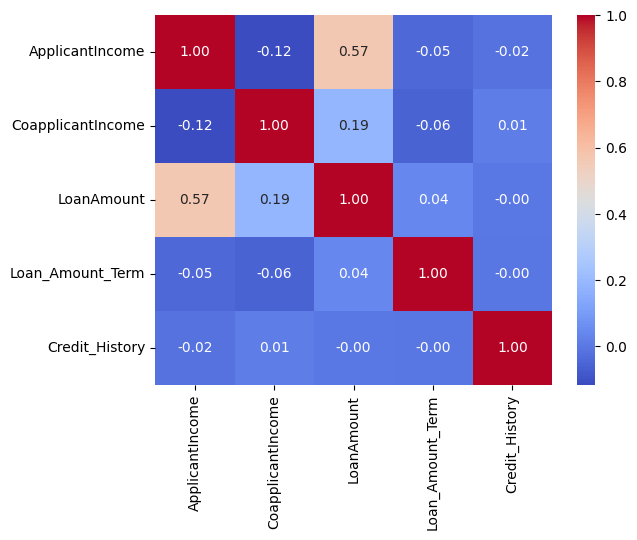

In [29]:
corr = df.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

plt.show()

In [30]:
#Education_loan=df[['Education', 'Loan_Status']].groupby(['Education', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
#Gender_loan=df[['Gender', 'Loan_Status']].groupby(['Gender', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
#Self_Employed=df[['Self_Employed', 'Loan_Status']].groupby(['Self_Employed', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
#Credit_History=df[['Credit_History', 'Loan_Status']].groupby(['Credit_History', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()


#cols = ['Education', 'Gender', 'Self_Employed', 'Credit_History']

#for col in cols:
    #plt.figure(figsize=(6,4))
    #sns.countplot(x=col, hue='Loan_Status', data=df)
    #plt.title('Loan Status by {}'.format(col))
    #plt.xlabel(col)
    #plt.ylabel('Count')
    #plt.show()
#for col in ['Education','Gender','Self_Employed','Credit_History']:
  #print('\n\n')
  #df=col+'df'
  #df = pd.DataFrame(eval(df))
  #col_label = col.replace("_", " " )
  #fig1=plt.bar(data_frame=df, x=col, y='Count', color='Loan_Status', barmode='group', color_discrete_sequence=tricolor, text_auto=True, template='simple_white')

In [31]:
#df = df.groupby(['Property_Area', 'Loan_Status']).size().reset_index(name='Count') # group by Property_Area and Loan_Status and count the number of occurrences

# plot the bar chart
#fig, ax = plt.subplots()
#ax.bar(df[df['Loan_Status'] == 'Y']['Property_Area'], df[df['Loan_Status'] == 'Y']['Count'], 
       #color='green', label='Loan Approved')
#ax.bar(df[df['Loan_Status'] == 'N']['Property_Area'], df[df['Loan_Status'] == 'N']['Count'], 
       #color='red', label='Loan Rejected')
#ax.set_xlabel('Property Area')
#ax.set_ylabel('Count')
#ax.set_title('Impact of Property Area on Loan Approval')
#ax.legend()
#plt.show()


In [32]:
#property_df = df.groupby(['Property_Area', 'Loan_Status'])['Loan_Status'].count().unstack()
#plt.pie(property_df['Y'], labels=property_df.index, autopct='%1.1f%%')
#plt.title('Loan Approval by Property Area')
#plt.show()

In [33]:
#one_hot = pd.get_dummies(df['Gender'],prefix="Gender",drop_first=True)
#df = df.drop('Gender',axis = 1)
#df = df.join(one_hot)

#print(df.head())

In [34]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
#one_hot = pd.get_dummies(df['Property_Area'],prefix="Property_Area",drop_first=True)
#df = df.drop('Property_Area',axis = 1)
#df = df.join(one_hot)
#df.head()

In [36]:
# create dataframes for each variable of interest
#education_loan = df[['Education', 'Loan_Status']].groupby(['Education', 'Loan_Status']).agg(count=('Loan_Status','count')).reset_index()
#gender_loan = df[['Gender', 'Loan_Status']].groupby(['Gender', 'Loan_Status']).agg(count=('Loan_Status','count')).reset_index()
#self_employed_loan = df[['Self_Employed', 'Loan_Status']].groupby(['Self_Employed', 'Loan_Status']).agg(count=('Loan_Status','count')).reset_index()
#credit_history_loan = df[['Credit_History', 'Loan_Status']].groupby(['Credit_History', 'Loan_Status']).agg(count=('Loan_Status','count')).reset_index()

# plot the results
#for data, var in [(education_loan, 'Education'), (gender_loan, 'Gender'), (self_employed_loan, 'Self Employed'), (credit_history_loan, 'Credit History')]:
    #plt.figure(figsize=(6,4))
    #sns.barplot(x=var, y='count', hue='Loan_Status', data=df)
    #plt.title('Loan Status by {}'.format(var))
    #plt.xlabel(var)
    #plt.ylabel('Count')
    #plt.xticks(rotation=45)
    #plt.show()

In [37]:
def process(df):
  df['Dependents'] = df['Dependents'].replace('3+',3)
  df['Dependents'] = df['Dependents'].astype(int)           #Converting string to int
  
  df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

  df['Married']=df['Married'].map({'Yes':1,'No':0})
  
  df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
    
  df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})

  df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

  #OneHot=OneHotEncoder(sparse=False)
  #transformed=OneHot.fit_transform(df[['Property_Area']])
    
  #df[OneHot.categories_[0]]=transformed
  #df=df.drop('Property_Area',axis=1)

  OneHot = pd.get_dummies(df['Property_Area'],prefix="Property_Area",drop_first=True)
  df = df.drop('Property_Area',axis = 1)
  df = df.join(OneHot)

  df.replace({'Y':1,'N':0},inplace=True)

  return df

In [38]:
prop_area_loan = df[['Property_Area', 'Loan_Status']].groupby(['Property_Area', 'Loan_Status']).agg(count=('Loan_Status', 'count')).reset_index()

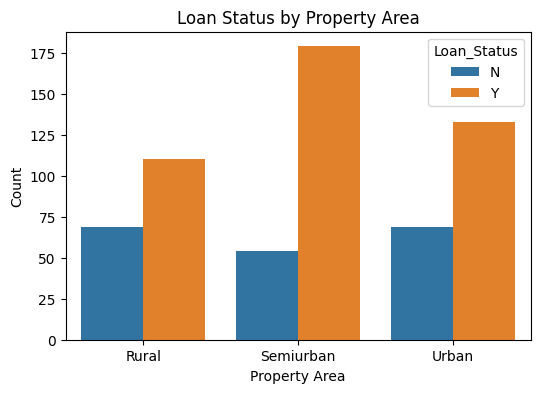

In [39]:
# group data by Property_Area and Loan_Status
property_loan = df[['Property_Area', 'Loan_Status']].groupby(['Property_Area', 'Loan_Status']).agg(count_loan_status=('Loan_Status','count')).reset_index()

# plot the results
plt.figure(figsize=(6,4))
sns.barplot(x='Property_Area', y='count_loan_status', hue='Loan_Status', data=property_loan)
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()


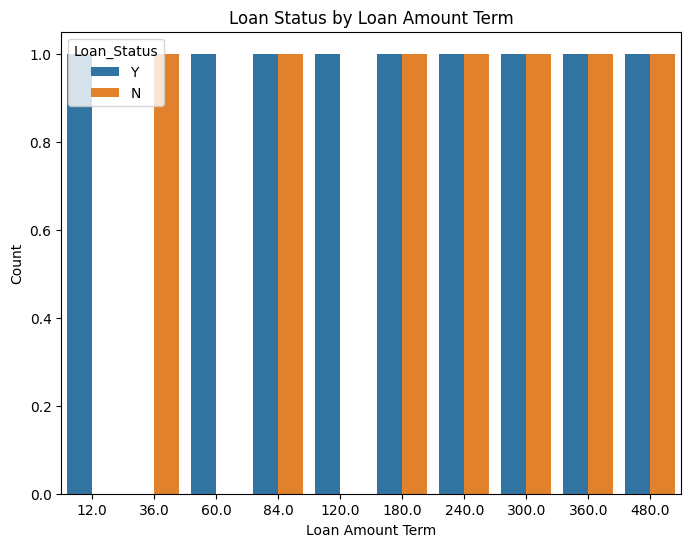

In [40]:
loan_term = df[['Loan_Amount_Term', 'Loan_Status']].groupby(['Loan_Amount_Term', 'Loan_Status']).size().reset_index(name='count')

plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=loan_term)
plt.title('Loan Status by Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.show()

In [41]:
#if 'Gender' in df.columns:
    #print('Gender column is present')
#else:
    #print('Gender column is not present')

In [42]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [43]:
df.corr()

<ipython-input-43-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000


In [44]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

# convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# separate features and target variable
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression(solver='liblinear')

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf)

Best parameters:  {'C': 0.001, 'max_iter': 1000, 'penalty': 'l2'}
Best score:  0.8148010719439291


In [48]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.001, max_iter=1000, penalty='l2', solver='liblinear', random_state=42)

LR.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=1000, random_state=42, solver='liblinear')

In [49]:
y_pred = LR.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

[[18 25]
 [ 1 79]]


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf)
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
Best score:  0.8148216862502575
CV results: [0.72727273 0.75510204 0.85714286 0.84693878 0.85714286]
Mean CV accuracy: 0.8087198515769944


In [52]:
RF = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=10, n_estimators=100)

RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

[[18 25]
 [ 2 78]]


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [54]:
RF = RandomForestClassifier(n_estimators=250, random_state=250)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250, random_state=250)

In [55]:
y_pred = RF.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123

[[18 25]
 [ 5 75]]


In [57]:
feature_importance = RF.feature_importances_

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score

DT = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf)
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best score:  0.7984539270253557
CV results: [0.75757576 0.71428571 0.81632653 0.84693878 0.84693878]
Mean CV accuracy: 0.796413110698825


In [59]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2)

DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [60]:
y_pred = DT.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.42      0.53        43
           1       0.74      0.91      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.67       123
weighted avg       0.74      0.74      0.72       123

[[18 25]
 [ 7 73]]


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

KNN = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(KNN, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

kf = KFold(n_splits=5)
kf_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf)
print("KF results:", kf_results)
print("Mean KF accuracy:", kf_results.mean())

Best parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'uniform'}
Best score:  0.7983508554937127
CV results: [0.80808081 0.80612245 0.78571429 0.78571429 0.80612245]
Mean CV accuracy: 0.7983508554937127
KF results: [0.76767677 0.83673469 0.78571429 0.78571429 0.80612245]
Mean KF accuracy: 0.7963924963924963


In [63]:
KNN = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9, weights='uniform')

KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9)

In [64]:
y_pred = KNN.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123

[[18 25]
 [ 0 80]]


In [66]:
import sklearn
print(sklearn.__version__)


!pip install --upgrade scikit-learn


!pip install matplotlib-venn


!apt-get -qq install -y libfluidsynth1


!apt-get -qq install -y graphviz && pip install pydot
import pydot


!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive


!pip install cartopy
import cartopy

1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
E: Package 'libfluidsynth1' has no installation candidate
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


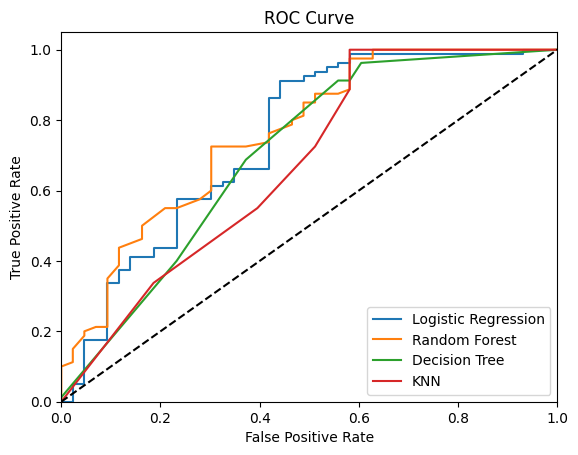

                 Model  Accuracy  F1 Score  Precision  Recall   ROC AUC
0  Logistic Regression  0.788618  0.858696   0.759615  0.9875  0.745058
1        Random Forest  0.756098  0.833333   0.750000  0.9375  0.760465
2        Decision Tree  0.739837  0.820225   0.744898  0.9125  0.703634
3                  KNN  0.796748  0.864865   0.761905  1.0000  0.673256


In [67]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

models = [('Logistic Regression', LR), ('Random Forest', RF), ('Decision Tree', DT), ('KNN', KNN)]

results = []

for name, model in models:
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    
    results.append((name, accuracy, f1, precision, recall, roc_auc))
    
    # plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=name)
    
# plot ROC curve for all models
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# print results as a table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC'])
print(results_df)